In [1]:
# Bloc non affiché

import numpy as np
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, confusion_matrix,accuracy_score, matthews_corrcoef, make_scorer


from xgboost import XGBClassifier
from xgboost import plot_importance


from sklearn.model_selection import GridSearchCV



def result_model(model,X,Y, mat = True) :
    Y_model =model.predict(X)

    f1_scor = f1_score(Y,Y_model)
    print('Le f1 score vaut',f1_scor)
    
#     score = cross_val_score(model,X,Y,cv=5,scoring = make_scorer(f1_score))
#     print('F1 cross validé :', np.mean(score))
    
    if mat:
    # Matrice de confusion
        cm_model = confusion_matrix(Y, Y_model)
        plt.rcParams['figure.figsize'] = (5, 5)
        sns.heatmap(cm_model, annot = True)
        plt.title(str(model))
        plt.show()
    
    return(f1_scor)

# Modèle finale

## Téléchargement des données

In [2]:
train = pd.read_csv("https://www.data.mclavier.com/prj_datascience/train_v1.csv")

## Pre-processing

On sépare dans un premier temps les variables explicatives et la variable à expliquer.

In [3]:
# Décomposition features / target
X = train.drop(columns='Response')
Y = train['Response']

Le modèle final sera entrainé sur l'intégralité de la base que nous possédons. Mais actuellement, nous souhaitons mesure le caractère prédictif de nos données et donc pour éviter l'overfitting, nous séparons tout de même nos données.

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,train_size = 0.85)

## Modèle

On utilise les paramètres déterminé dans le précédent notebook

In [6]:
 params = {
    'objective': 'binary:logistic',
    'base_score': 0.5,
    'booster': 'gbtree',
    'colsample_bylevel': 1,
    'colsample_bynode': 1,
    'colsample_bytree': 0.9,
    'gamma': 0,
    'gpu_id': -1,
    'interaction_constraints': '',
    'learning_rate': 0.1,
    'max_delta_step': 0,
    'max_depth': 50,
    'min_child_weight': 5,
    'monotone_constraints': '()',
    'n_jobs': 8,
    'num_parallel_tree': 1,
    'predictor': 'auto',
    'random_state': 0,
    'reg_alpha': 1e-05,
    'reg_lambda': 1,
    'scale_pos_weight': 1,
    'subsample': 0.7,
    'tree_method': 'exact',
    'validate_parameters': 1,
    'verbosity': None,
    'seed': 27,
    'nthread': 7,
    'use_label_encoder': False,
    'n_estimators': 1000
}

In [7]:
xgb0 = XGBClassifier(**params)
xgb0.fit(X_train, Y_train)

[22:43:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.9,
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=50,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=8, nthread=7, num_parallel_tree=1,
              predictor='auto', random_state=0, reg_alpha=1e-05, reg_lambda=1,
              scale_pos_weight=1, seed=27, subsample=0.7, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, ...)

Le f1 score vaut 0.3966675624832034


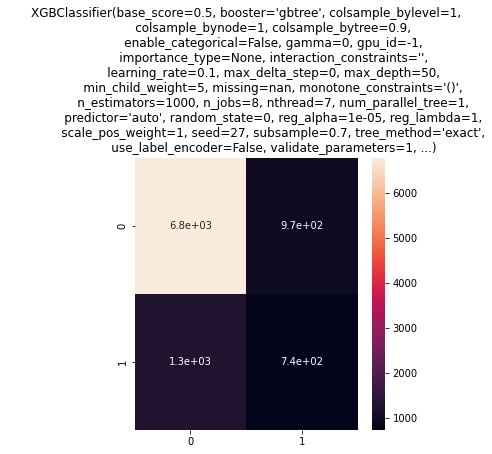

0.3966675624832034

In [8]:
result_model(xgb0, X_test, Y_test)

In [16]:
xgb1 = XGBClassifier(**params)
xgb1.fit(X, Y)

[13:07:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.9,
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=50,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=8, nthread=7, num_parallel_tree=1,
              predictor='auto', random_state=0, reg_alpha=1e-05, reg_lambda=1,
              scale_pos_weight=1, seed=27, subsample=0.7, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, ...)

In [20]:
result_model(xgb1, X_test, Y_test, mat = False)

Le f1 score vaut 0.9996244836650394


Bien évidemment, le modèle entrainé sur X contient X_test, et donc il y a de l'overfitting si l'on teste sur Y_test.

```{warning}
C'est peut-être finalement le random forest le meilleur.
```

In [9]:
param = [947, 0.11959494750571721, 0.08048576405844253, 0.030792701550521537, 88]

In [10]:
from sklearn.ensemble import RandomForestClassifier

In [11]:
rfc = RandomForestClassifier(min_samples_split=param[1],
                             min_samples_leaf=param[2],min_impurity_decrease=param[3],
                             n_estimators=param[4], class_weight="balanced")
rfc.fit(X_train, Y_train)

RandomForestClassifier(class_weight='balanced',
                       min_impurity_decrease=0.030792701550521537,
                       min_samples_leaf=0.08048576405844253,
                       min_samples_split=0.11959494750571721, n_estimators=88)

In [12]:
result_model(rfc, X_test, Y_test, mat = False)

Le f1 score vaut 0.5398570643210555


0.5398570643210555

## Export des prédictions

Pour le rendu final, nous entrainons la base de données sur toute la bdd train.

**Traitement de la bdd test**

Nous appliquons le même traitement à la bdd test qu'à la bdd train.

In [31]:
test = pd.read_csv("https://www.data.mclavier.com/prj_datascience/brut_test.csv")
test.drop(columns='id', inplace = True)

dict_cat = {'No' : 0, 'Yes' : 1}
test.Vehicle_Damage.replace(dict_cat, inplace = True)

dict_cat = {'Male' : 0, 'Female' : 1}
test.replace(dict_cat, inplace = True)

dict_cat = {152 : 0, 26 : 1, 124 : 2}

def default_dict(x):
    if x in dict_cat:
        return dict_cat[x]
    else:
        return 3

new_damage = test.Policy_Sales_Channel.apply(lambda x : default_dict(x))
test['Policy_Sales_Channel'] = new_damage


dict_age = {'1-2 Year' : 1, '< 1 Year' : 0, '> 2 Years' : 2}
test.replace(dict_age, inplace = True)

X_to_predict = test

In [32]:
X_to_predict.head(3)

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,1,49,1,18,0,1,1,38609,2,180
1,1,26,1,11,1,0,0,18452,0,105
2,1,80,1,28,0,2,1,30245,1,167


In [26]:
xgb_final = XGBClassifier(**params)
xgb_final.fit(X, Y)

[13:17:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.9,
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=50,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=8, nthread=7, num_parallel_tree=1,
              predictor='auto', random_state=0, reg_alpha=1e-05, reg_lambda=1,
              scale_pos_weight=1, seed=27, subsample=0.7, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, ...)

In [79]:
Y_predict = xgb_final.predict(X_to_predict)

On l'exporte sous le même format que la base de donnée X.

In [80]:
Y_predict = pd.DataFrame(Y_predict)
Y_predict.rename(columns={0:'Response'}, inplace = True)
id_col = pd.read_csv("https://www.data.mclavier.com/prj_datascience/brut_test.csv", usecols=['id']).values
Y_predict['id'] = id_col
Y_predict = Y_predict[['id', 'Response']]

Y_predict.head()

,id,Response
0,1,0
1,2,0
2,3,1
3,4,0
4,5,0


In [82]:
Y_predict.to_csv("groupe_1_predictions.csv", index = False)

Vérification du fichier :

In [84]:
pd.read_csv('groupe_1_predictions.csv')

,id,Response
0,1,0
1,2,0
2,3,1
3,4,0
4,5,0
...,...,...
7145,7146,0
7146,7147,0
7147,7148,0
7148,7149,0


## Conclusion

Vous pouvez télécharger le fichier [groupe_1_prediction.csv](https://www.data.mclavier.com/prj_datascience/groupe_1_predictions.csv) pour évaluer le modèle.

<br><br><br><br><br><br><br>